Label prediksi pertama: 0
Centroids:
 [[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]


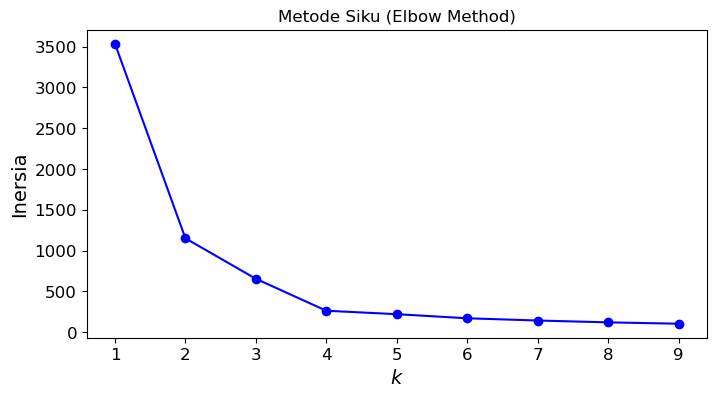

Dari kurva, k=5 terlihat sebagai pilihan yang baik.


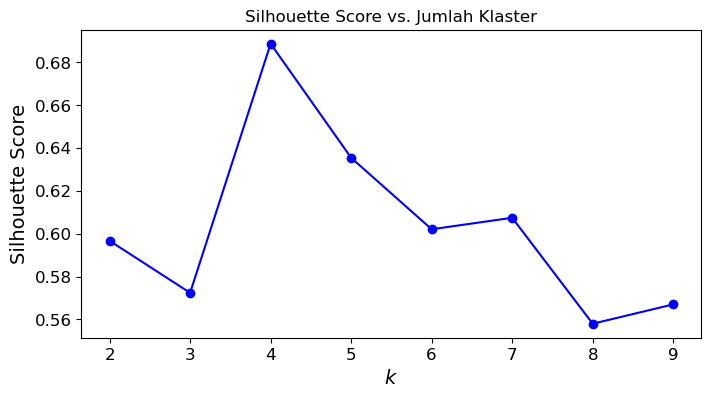

Silhouette score tertinggi juga ada di sekitar k=4 atau k=5, mengkonfirmasi pilihan kita.

Jumlah klaster unik (termasuk noise): 2
Contoh label DBSCAN: [0 0 0 0 1 0 0 0 0 1]

Bobot GMM: [0.09 0.4  0.2  0.2  0.11]
Mean GMM:
 [[ 0.06  2.56]
 [-2.8   1.55]
 [-2.8   2.8 ]
 [-1.48  2.29]
 [ 0.31  2.02]]


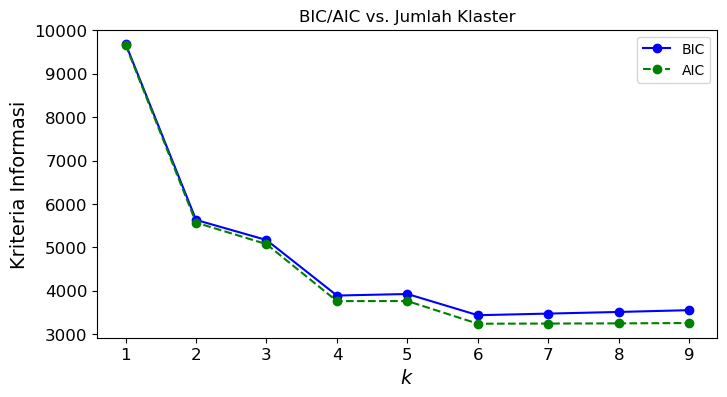

Nilai BIC dan AIC terendah ada di k=5, yang merupakan jumlah klaster yang benar.

Jumlah anomali terdeteksi: 80

Gagal memuat gambar: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.. Mungkin perlu koneksi internet.

Akurasi Baseline Logistic Regression: 0.9733
Akurasi dengan K-Means Preprocessing: 0.9756

Akurasi pada 50 sampel berlabel: 0.8267
Akurasi pada 50 sampel representatif: 0.9044


'\n### Latihan: Jawaban Teoretis\n\n**1. Bagaimana Anda mendefinisikan clustering? Sebutkan beberapa algoritma clustering.**\n- **Definisi**: Clustering adalah tugas mengelompokkan instance data yang mirip ke dalam grup-grup yang disebut klaster. Ini adalah tugas *unsupervised learning* karena tidak menggunakan label.\n- **Contoh Algoritma**: K-Means, DBSCAN, Agglomerative Clustering, BIRCH, Mean-Shift, Affinity Propagation, Spectral Clustering, Gaussian Mixture Models.\n\n**2. Apa saja aplikasi utama dari algoritma clustering?**\nSegmentasi pelanggan, analisis data, sistem rekomendasi, deteksi anomali (outlier), *semi-supervised learning*, reduksi dimensi, dan segmentasi citra.\n\n**3. Jelaskan dua teknik untuk memilih jumlah klaster yang tepat saat menggunakan K-Means.**\n- **Metode Siku (Elbow Method)**: Plot *inertia* (total jarak kuadrat dari setiap titik ke centroid-nya) terhadap jumlah klaster `k`. Pilih `k` pada titik "siku" di mana penurunan inertia tidak lagi signifikan.\n- *

In [3]:
# --- SETUP AWAL ---
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

# Impor library umum
import numpy as np
import pandas as pd
import os

# Untuk membuat plot yang konsisten
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Direktori untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

"""
# Bab 9: Unsupervised Learning Techniques

## Penjelasan Teoretis: Konsep Dasar Unsupervised Learning
Sejauh ini kita fokus pada *supervised learning* di mana data memiliki label. Namun, sebagian besar data di dunia ini tidak berlabel. *Unsupervised learning* mencoba menemukan pola atau struktur tersembunyi dari data tanpa label.

Tugas utama dalam unsupervised learning meliputi:
- **Clustering**: Mengelompokkan data yang mirip ke dalam grup (klaster).
- **Anomaly Detection**: Mendeteksi data yang "tidak normal" atau menyimpang dari pola umum.
- **Density Estimation**: Memperkirakan fungsi kepadatan probabilitas (PDF) dari data.

Bab ini akan membahas teknik-teknik untuk tugas-tugas tersebut.
"""

# --- 1. Clustering ---
"""
Clustering adalah tugas mengidentifikasi instance yang mirip dan mengelompokkannya ke dalam klaster. Ini sangat berguna untuk segmentasi pelanggan, analisis data, deteksi anomali, dan banyak lagi.

### a. K-Means
K-Means adalah algoritma clustering yang sederhana dan efisien. Ia mencoba menemukan pusat (centroid) dari sejumlah `k` klaster dan menetapkan setiap instance ke klaster dengan centroid terdekat.
"""
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Membuat dataset "blobs"
blob_centers = np.array(
    [[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

# Melatih model K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Label klaster dan centroid
print("Label prediksi pertama:", y_pred[0])
print("Centroids:\n", kmeans.cluster_centers_)

"""
#### Menemukan Jumlah Klaster yang Optimal
Bagaimana cara mengetahui nilai `k` yang benar?
1.  **Metode Siku (Elbow Method)**: Plot *inertia* (jumlah kuadrat jarak setiap instance ke centroid terdekatnya) sebagai fungsi dari `k`. Pilih `k` di "siku" kurva, di mana penurunan inertia mulai melambat.
2.  **Silhouette Score**: Mengukur seberapa baik sebuah instance berada di dalam klasternya sendiri dibandingkan dengan klaster lain. Skor berkisar dari -1 hingga 1. Skor yang lebih tinggi lebih baik.
"""
# 1. Elbow Method
kmeans_per_k = [KMeans(n_clusters=i, random_state=42, n_init=10).fit(X) for i in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inersia")
plt.title("Metode Siku (Elbow Method)")
plt.show()
print("Dari kurva, k=5 terlihat sebagai pilihan yang baik.")


# 2. Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] # Mulai dari k=2

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Jumlah Klaster")
plt.show()
print("Silhouette score tertinggi juga ada di sekitar k=4 atau k=5, mengkonfirmasi pilihan kita.")


"""
### b. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Algoritma ini mendefinisikan klaster sebagai wilayah kontinu dengan kepadatan tinggi.
- **Cara Kerja**: DBSCAN menghitung jumlah instance dalam jarak `eps` (epsilon) dari setiap instance. Jika jumlahnya mencapai `min_samples`, instance tersebut dianggap *core instance*. Klaster terbentuk dari rangkaian *core instances* yang berdekatan.
- **Keunggulan**: Dapat menemukan klaster dengan bentuk apa pun dan tahan terhadap outlier (dianggap sebagai noise).
"""
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_moons)

# Label -1 menunjukkan outlier/noise
print("\nJumlah klaster unik (termasuk noise):", len(set(dbscan.labels_)))
print("Contoh label DBSCAN:", dbscan.labels_[:10])


# --- 2. Gaussian Mixture Models (GMM) ---
"""
GMM adalah model probabilistik yang mengasumsikan data dihasilkan dari campuran beberapa distribusi Gaussian dengan parameter yang tidak diketahui. Setiap distribusi Gaussian membentuk satu klaster berbentuk elips.

GMM dapat digunakan untuk:
- **Density Estimation**: Memperkirakan PDF dari data.
- **Clustering**: Mengelompokkan data.
- **Anomaly Detection**: Mendeteksi data di wilayah berdensitas rendah.
"""
from sklearn.mixture import GaussianMixture

# Menggunakan data blobs dari K-Means
gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(X)

print("\nBobot GMM:", gm.weights_.round(2))
print("Mean GMM:\n", gm.means_.round(2))

"""
#### Memilih Jumlah Klaster untuk GMM
Karena inertia dan silhouette score tidak andal untuk klaster non-sferis, kita menggunakan kriteria informasi teoretis:
- **BIC (Bayesian Information Criterion)**
- **AIC (Akaike Information Criterion)**

Kita memilih model yang meminimalkan nilai BIC atau AIC. BIC cenderung memilih model yang lebih sederhana (parameter lebih sedikit).
"""
bics = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X).bic(X) for k in range(1, 10)]
aics = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X).aic(X) for k in range(1, 10)]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), bics, "bo-", label="BIC")
plt.plot(range(1, 10), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Kriteria Informasi")
plt.legend()
plt.title("BIC/AIC vs. Jumlah Klaster")
plt.show()
print("Nilai BIC dan AIC terendah ada di k=5, yang merupakan jumlah klaster yang benar.")


"""
#### Anomaly Detection dengan GMM
Instance yang berada di wilayah berdensitas rendah dapat dianggap sebagai anomali. Kita bisa menentukan ambang batas densitas untuk menandai anomali.
"""
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # Ambil ambang batas 4%
anomalies = X[densities < density_threshold]

print(f"\nJumlah anomali terdeteksi: {len(anomalies)}")

# --- 3. Aplikasi Clustering ---
"""
#### a. Segmentasi Citra
Kita bisa mengelompokkan piksel berdasarkan warnanya. Setiap piksel kemudian diganti dengan warna rata-rata (centroid) dari klasternya.
"""
from matplotlib.image import imread
try:
    # URL gambar ladybug dari repo Hands-On ML
    image_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
    image = imread(image_url)
    
    X_img = image.reshape(-1, 3)
    kmeans_img = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X_img)
    segmented_img = kmeans_img.cluster_centers_[kmeans_img.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(image)
    plt.title("Gambar Asli")
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(segmented_img)
    plt.title("Gambar Tersegmentasi (8 Warna)")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"\nGagal memuat gambar: {e}. Mungkin perlu koneksi internet.")


"""
#### b. Clustering sebagai Preprocessing (Dimensionality Reduction)
Clustering bisa digunakan untuk mengurangi dimensi sebelum melatih model supervised.
"""
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_digits, y_digits = load_digits(return_X_y=True)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, random_state=42)

# Baseline: Logistic Regression saja
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_d, y_train_d)
print(f"\nAkurasi Baseline Logistic Regression: {log_reg.score(X_test_d, y_test_d):.4f}")

# Pipeline dengan K-Means sebagai preprocessing
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42, n_init=10)),
    ("log_reg", LogisticRegression(max_iter=10000, random_state=42)),
])
pipeline.fit(X_train_d, y_train_d)
print(f"Akurasi dengan K-Means Preprocessing: {pipeline.score(X_test_d, y_test_d):.4f}")


"""
#### c. Semi-Supervised Learning
Ketika kita punya banyak data tak berlabel dan sedikit data berlabel.
1. Latih model clustering pada semua data.
2. Temukan instance representatif untuk setiap klaster (yang paling dekat dengan centroid).
3. Labeli hanya instance representatif ini secara manual.
4. Latih model supervised pada dataset kecil yang sudah dilabeli ini.
5. (Opsional) Propagasi label ke instance lain dalam klaster yang sama.
"""
# 1. Latih model pada 50 sampel berlabel
n_labeled = 50
log_reg_semi = LogisticRegression(max_iter=10000, random_state=42)
log_reg_semi.fit(X_train_d[:n_labeled], y_train_d[:n_labeled])
print(f"\nAkurasi pada 50 sampel berlabel: {log_reg_semi.score(X_test_d, y_test_d):.4f}")

# 2. Gunakan label yang dipropagasi dari centroid
k = 50
kmeans_semi = KMeans(n_clusters=k, random_state=42, n_init=10)
X_digits_dist = kmeans_semi.fit_transform(X_train_d)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
y_representative_digits = y_train_d[representative_digit_idx]

# Latih model pada 50 sampel representatif
log_reg_propagated = LogisticRegression(max_iter=10000, random_state=42)
log_reg_propagated.fit(X_train_d[representative_digit_idx], y_representative_digits)
print(f"Akurasi pada 50 sampel representatif: {log_reg_propagated.score(X_test_d, y_test_d):.4f}")


# --- JAWABAN LATIHAN TEORETIS ---

"""
### Latihan: Jawaban Teoretis

**1. Bagaimana Anda mendefinisikan clustering? Sebutkan beberapa algoritma clustering.**
- **Definisi**: Clustering adalah tugas mengelompokkan instance data yang mirip ke dalam grup-grup yang disebut klaster. Ini adalah tugas *unsupervised learning* karena tidak menggunakan label.
- **Contoh Algoritma**: K-Means, DBSCAN, Agglomerative Clustering, BIRCH, Mean-Shift, Affinity Propagation, Spectral Clustering, Gaussian Mixture Models.

**2. Apa saja aplikasi utama dari algoritma clustering?**
Segmentasi pelanggan, analisis data, sistem rekomendasi, deteksi anomali (outlier), *semi-supervised learning*, reduksi dimensi, dan segmentasi citra.

**3. Jelaskan dua teknik untuk memilih jumlah klaster yang tepat saat menggunakan K-Means.**
- **Metode Siku (Elbow Method)**: Plot *inertia* (total jarak kuadrat dari setiap titik ke centroid-nya) terhadap jumlah klaster `k`. Pilih `k` pada titik "siku" di mana penurunan inertia tidak lagi signifikan.
- **Silhouette Score**: Mengukur seberapa baik setiap instance cocok dengan klasternya sendiri dibandingkan dengan klaster lain. Pilih `k` yang memberikan *silhouette score* tertinggi.

**4. Apa itu propagasi label (label propagation)? Mengapa dan bagaimana Anda akan mengimplementasikannya?**
- **Definisi**: Ini adalah teknik *semi-supervised learning* di mana kita menyebarkan label dari sejumlah kecil data berlabel ke sejumlah besar data tak berlabel.
- **Mengapa**: Untuk meningkatkan jumlah data pelatihan berlabel secara drastis dengan usaha pelabelan manual yang minimal, sehingga bisa meningkatkan kinerja model.
- **Bagaimana**: Latih model clustering pada semua data. Beri label pada instance representatif (misalnya, yang paling dekat dengan centroid) dari setiap klaster. Kemudian, sebarkan label-label ini ke semua instance lain dalam klaster yang sama.

**5. Sebutkan dua algoritma clustering yang dapat diskalakan ke dataset besar. Dan dua yang mencari wilayah berdensitas tinggi.**
- **Skala Besar**: K-Means (terutama varian Mini-Batch K-Means) dan BIRCH.
- **Berdasarkan Densitas**: DBSCAN dan Mean-Shift.

**6. Bisakah Anda memikirkan kasus penggunaan di mana active learning akan berguna? Bagaimana Anda akan mengimplementasikannya?**
- **Kasus Penggunaan**: Sangat berguna ketika pelabelan data mahal atau memakan waktu (misalnya, diagnosis medis dari gambar, analisis dokumen hukum).
- **Implementasi (Uncertainty Sampling)**:
  1. Latih model pada data berlabel yang ada.
  2. Gunakan model tersebut untuk memprediksi data yang belum berlabel.
  3. Identifikasi instance di mana model paling "tidak yakin" (misalnya, probabilitas prediksi mendekati 50% untuk klasifikasi biner).
  4. Berikan instance yang tidak pasti ini kepada ahli manusia untuk dilabeli.
  5. Tambahkan instance yang baru dilabeli ini ke set pelatihan dan ulangi prosesnya.

**7. Apa perbedaan antara anomaly detection dan novelty detection?**
- **Anomaly Detection**: Algoritma dilatih pada dataset yang **mungkin sudah terkontaminasi** dengan outlier. Tujuannya adalah untuk mendeteksi outlier-outlier ini.
- **Novelty Detection**: Algoritma dilatih pada dataset yang diasumsikan "bersih" (hanya berisi data normal). Tujuannya adalah untuk mendeteksi instance **baru** yang berbeda dari data pelatihan normal.

**8. Apa itu Gaussian Mixture Model (GMM)? Untuk tugas apa Anda bisa menggunakannya?**
- **Definisi**: GMM adalah model probabilistik yang mengasumsikan data dihasilkan dari campuran beberapa distribusi Gaussian. Setiap distribusi Gaussian mewakili satu klaster.
- **Tugas**: Density estimation, clustering, dan anomaly detection.

**9. Sebutkan dua teknik untuk menemukan jumlah klaster yang tepat saat menggunakan Gaussian Mixture Model.**
BIC (Bayesian Information Criterion) dan AIC (Akaike Information Criterion). Kita memilih jumlah klaster `k` yang meminimalkan skor BIC atau AIC. BIC cenderung menghasilkan model yang lebih sederhana.
"""
